## 1. Importing Packages And Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split  
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## 2. Load CSV File

In [23]:
dataset_df=pd.read_csv('D:\krishna\cancer_dataset_ML\cell_samples.csv')
dataset_df.head()
dataset_df.shape
dataset_df.count()
dataset_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

## 3. Distribution Of Classes

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

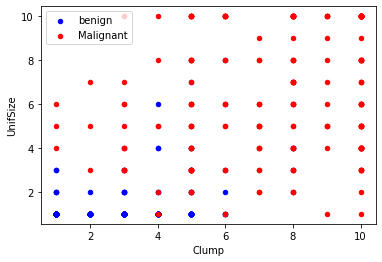

In [24]:
 benign_df =dataset_df[dataset_df['Class']==2][0:200]
 malignant_df =dataset_df[dataset_df['Class']==4][0:200]
  
 axes=benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='benign')
 malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)
        

## 4. Identifying Unwanted Data

In [15]:
dataset_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

## 5. Removing Unwanted Data

In [17]:
#converting non numeric data into numeric data forcefully by using coerce
dataset_df =dataset_df[pd.to_numeric(dataset_df['BareNuc'], errors='coerce').notnull()]

#converting object datatype of BareNuc into type int
dataset_df['BareNuc']= dataset_df['BareNuc'].astype('int')

dataset_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [18]:
dataset_df.columns
#checking relevent columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [19]:
relevent_df=dataset_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#converting dataset into array

#x is the 2 dimensional array of all independent variables
x = np.asarray(relevent_df)

#y is the 1 dimensional array of dependent variable
y = np.asarray(dataset_df['Class'])

In [20]:
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [21]:
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

## 6. Divide Dataset Into Training And Testing Part

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x , y , test_size=0.2 , random_state=42)



In [27]:
x_train.shape

(546, 9)

In [28]:
x_test.shape

(137, 9)

## 7. Build A Model (SVM with Scikit learn)

In [32]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

## 8. Manual Evaluation 

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



## 9. Accuracy Score

In [39]:
#find number of accurate predictions
accurate_predictions = accuracy_score(y_test, y_predict, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

The number of accurate predictions is:  132


In [38]:
#find accuracy percentage 
accuracy = accuracy_score(y_test, y_predict)
print("The accuracy of prediction is: ", accuracy*100)

The accuracy of prediction is:  96.35036496350365
